In [34]:
import numpy as np
import pandas as pd

**May 31: Adding dataset, exploring it, and removing values that aren't consistent throughout**

As of May 27, 2020 (because the dataset is updated each day)

* 212 locations (countries?) represented, with 20128 individual entries
* each country has at max, 149 data values (representing 149 days of data)
* will probably need to focus on just a couple of countries to get anything of substance
* a lot of the columns have a lot of null values for certain countries, so should probably stray away from using those for the sake of consistency. Unless I'm focusing on one country in specific, in which case they could prove useful.

In [35]:
covid = pd.read_csv("owid-covid-data.csv")

In [36]:
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [37]:
covid.shape # gives #rows, #cols

(20128, 32)

In [38]:
covid.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [39]:
covid['location'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

In [40]:
len(covid['location'].unique())

212

In [41]:
covid['location'].value_counts()[:20]

Belgium           149
Iceland           149
Israel            149
Lithuania         149
Croatia           149
Mexico            149
Russia            149
World             149
South Korea       149
Denmark           149
Canada            149
Italy             149
Nepal             149
United Kingdom    149
Belarus           149
United States     149
Greece            149
France            149
Singapore         149
Norway            149
Name: location, dtype: int64

In [42]:
america = covid.loc[covid['location']=='United States', ['date', 'total_cases', 'total_deaths']]
america.shape

(149, 3)

In [43]:
america.head()

,date,total_cases,total_deaths
18835,2019-12-31,0,0
18836,2020-01-01,0,0
18837,2020-01-02,0,0
18838,2020-01-03,0,0
18839,2020-01-04,0,0


In [44]:
caserange = pd.cut(america['total_cases'],10) # divides rating col into 10 equal ranges
pd.value_counts(caserange)

(-1681.212, 168121.2]     92
(1513090.8, 1681212.0]     8
(1344969.6, 1513090.8]     8
(1176848.4, 1344969.6]     7
(1008727.2, 1176848.4]     6
(840606.0, 1008727.2]      6
(504363.6, 672484.8]       6
(336242.4, 504363.6]       6
(672484.8, 840606.0]       5
(168121.2, 336242.4]       5
Name: total_cases, dtype: int64

In [72]:
import seaborn as sns

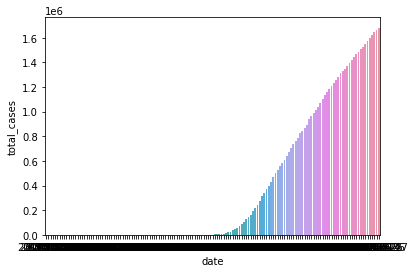

In [46]:
ax = sns.barplot(x = "date", y="total_cases", data=america)

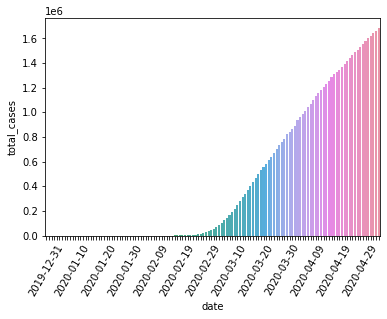

In [47]:
temp = america[america['total_cases'] > 0]
ax = sns.barplot(x = "date", y="total_cases", data=temp)
ax.set_xticklabels(america.date,rotation=60)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)

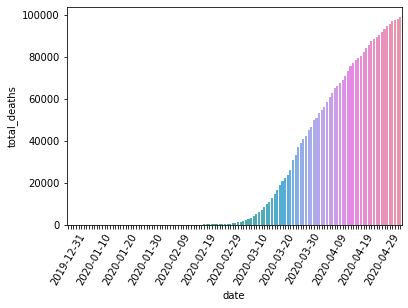

In [48]:
ax = sns.barplot(x = "date", y="total_deaths", data=temp)
ax.set_xticklabels(america.date,rotation=60)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)

In [49]:
# how to get deaths and total cases on the same plot?

**June 3: working on getting deaths and cases on the same graph, or at least sharing the same X axis with two graphs stacked vertically**

Resources used: 
1. [For stacking graphs](https://matplotlib.org/examples/pylab_examples/subplots_demo.html)
2. [For stackplots](https://pythonprogramming.net/stack-plot-matplotlib-tutorial/)
3. [For creating new col based on existing cols](https://cmdlinetips.com/2019/01/3-ways-to-add-new-columns-to-pandas-dataframe/)
4. [For potentially stacking the bars of the bar graph(for next time)](https://stackoverflow.com/questions/52952857/how-to-plot-stacked-bar-chart-using-one-of-the-variables-in-pandas)

In [50]:
import matplotlib.pyplot as plt

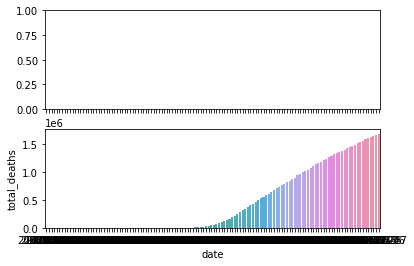

In [51]:
# this method loosely came from https://matplotlib.org/examples/pylab_examples/subplots_demo.html
f, axarr = plt.subplots(2, sharex=True)
axarr[0]=sns.barplot(x = "date", y="total_cases", data=temp)
axarr[1]=sns.barplot(x = "date", y="total_deaths", data=temp)

OK, so I thought the issue in the above cell is that total_deaths is on such a small scale compared to total_cases, but now I'm not sure because the bottom garph's y axis is labeled total_deaths, but it's measured \*1e6, making me think that's really total_cases and it's mislabeled.

Fixes: figure out how to increase the size of the y axis until the deaths are visible and then fix the axis labels, **or** find out how to just overlay the graphs (which would also require a larger y value to see the deaths in comparison to the scale of the cases)

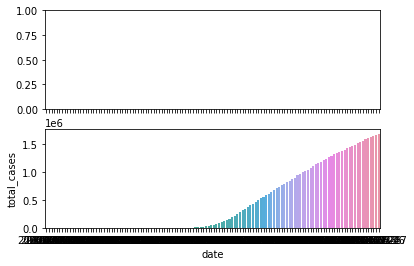

In [52]:
# attempt 1: just swap what's arr[0] and arr[1] and see what happens
f, axarr = plt.subplots(2, sharex=True)
axarr[0]=sns.barplot(x = "date", y="total_deaths", data=temp)
axarr[1]=sns.barplot(x = "date", y="total_cases", data=temp)

In [53]:
# literally no difference. confusing too because the graphs weren't swapped in terms of order
# also the y-axis still seems to be mislabeled

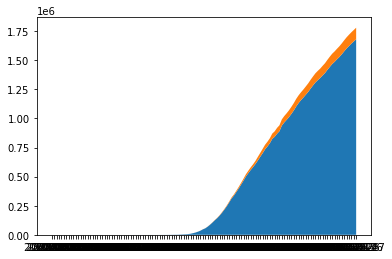

In [54]:
# let's try this thing from https://pythonprogramming.net/stack-plot-matplotlib-tutorial/
plt.stackplot("date", "total_cases","total_deaths", data = temp)

In [55]:
# ok so that stack plot kind of worked? still confused though because
# deaths should be MUCH smaller in comparison to cases

In [56]:
temp.mean(axis = 0)  

total_cases     446734.828125
total_deaths     24737.968750
dtype: float64

In [57]:
24737.968750/446734.828125

0.0553750618769265

In [58]:
# the above calculation shows that the deaths should make up only .055% of the total cases,
# which is certainly not the case in the graph above
# aaaaand this is where I read more and realized a stackplot plots parts to a whole over time
# aka, not what I want to do

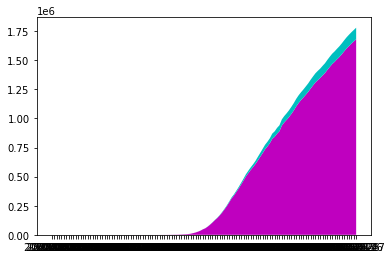

In [59]:
plt.plot([],[],color='m', label="total_cases", linewidth=5)
plt.plot([],[],color='c', label="total_deaths", linewidth=5)

plt.stackplot("date", "total_cases","total_deaths", data = temp, colors = ['m','c'])
# this was supposed to make a legend, so at least we would know what color represents which variable
# it didn't... this graph isn't really what we wanted anyways, so I'm going to move on

In [60]:
# pivoting for a second because I'm frustrated that stacked bar graphs like that don't seem to exist
# I want to come back to this: https://stackoverflow.com/questions/52952857/how-to-plot-stacked-bar-chart-using-one-of-the-variables-in-pandas
# which I think I can use if I just create slightly different variables in my dataframe

In [61]:
# but first, this other thing
# I'm going to create a new variable that's total_deaths/total_cases,
# to see how the relative frequency changes over time
temp.head()

,date,total_cases,total_deaths
18856,2020-01-21,1,0
18857,2020-01-22,1,0
18858,2020-01-23,1,0
18859,2020-01-24,1,0
18860,2020-01-25,2,0


In [83]:
temp.assign(relative_death=temp['total_deaths']/temp['total_cases'])
# came from https://cmdlinetips.com/2019/01/3-ways-to-add-new-columns-to-pandas-dataframe/

,date,total_cases,total_deaths,relative_death
18856,2020-01-21,1,0,0.000000
18857,2020-01-22,1,0,0.000000
18858,2020-01-23,1,0,0.000000
18859,2020-01-24,1,0,0.000000
18860,2020-01-25,2,0,0.000000
...,...,...,...,...
18979,2020-05-23,1601434,96007,0.059951
18980,2020-05-24,1622670,97087,0.059832
18981,2020-05-25,1643238,97720,0.059468
18982,2020-05-26,1662302,98220,0.059087


In [64]:
# now how to get rid of relative_deaths column that's the same as relative_death?
#temp.drop(['relative_deaths'], axis = 1)

In [73]:
# yay it's gone! now to graph relative_death
ax = sns.barplot(x = "date", y="relative_death", data=temp)
ax.set_xticklabels(america.date,rotation=60)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)

ValueError: Could not interpret input 'relative_death'

In [ ]:
# ooh! now that's an interesting graph. I wonder what happened around 2/29?
# initial guess is the initial death rate was high because there were so few confirmed cases

**June 6: I'm going to figure out how to overlay my bar graph the way I want. If that doesn't happen, I'm going to give up and move on because it's taking far too long**

* But first! Fixing the problem of relative_death disappearing from my dataset. More info in the README.
* Next, returning to [this](https://stackoverflow.com/questions/52952857/how-to-plot-stacked-bar-chart-using-one-of-the-variables-in-pandas%20#%20which%20I%20think%20I%20can%20use%20if%20I%20just%20create%20slightly%20different%20variables%20in%20my%20dataframe) thread to overlay my graph (maybe possibly).
* Realized that wouldn't work for my data.
* Next up, [this](https://stackoverflow.com/questions/23293011/how-to-plot-a-superimposed-bar-chart-using-matplotlib-in-python) other tutorial to overlay my graph! Which actually kind of worked?? But was unsatisfying because it confirmed my suspicions that since the death rate is so low relative to the number of cases, it's really underwhelming.
* Next, created dataframes for China and Italy, where I realized that total_cases never goes down... meaning I'd need to take into account recovered people and deaths to see where the peak was/is for any given country.

In [85]:
temp2 = temp.assign(relative_death=temp['total_deaths']/temp['total_cases'])
temp2.head()

,date,total_cases,total_deaths,relative_death
18856,2020-01-21,1,0,0.0
18857,2020-01-22,1,0,0.0
18858,2020-01-23,1,0,0.0
18859,2020-01-24,1,0,0.0
18860,2020-01-25,2,0,0.0


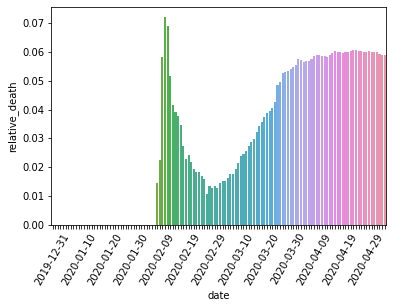

In [86]:
ax = sns.barplot(x = "date", y="relative_death", data=temp2)
ax.set_xticklabels(america.date,rotation=60)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)

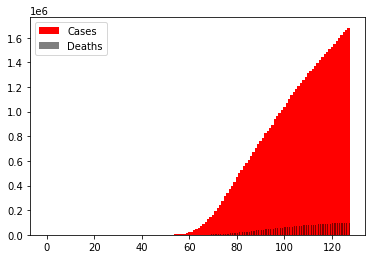

In [104]:
width = 1

higher = temp2['total_cases']
lower = temp2['total_deaths']

indices = np.arange(len(higher))

plt.bar(indices, higher, width=width, 
        color='r', label='Cases')
plt.bar([i+0.25*width for i in indices], lower, 
        width=0.5*width, color='black', alpha=0.5, label='Deaths')

#plt.xticks(indices+width/2., 
#           ['T{}'.format(i) for i in range(len(higher))] )

plt.legend()

plt.show()

# FINALLY a stacked bar graph that shows what I wanted!

In [106]:
# Italy dataset
italy = covid.loc[covid['location']=='Italy', ['date', 'total_cases', 'total_deaths']]
italy.head()

,date,total_cases,total_deaths
9540,2019-12-31,0,0
9541,2020-01-01,0,0
9542,2020-01-02,0,0
9543,2020-01-03,0,0
9544,2020-01-04,0,0


In [111]:
# China dataset
china = covid.loc[covid['location']=='China', ['date', 'total_cases', 'total_deaths']]
china.head()
# note to self that China's first case came before Dec. 31, 2019

,date,total_cases,total_deaths
3476,2019-12-31,27,0
3477,2020-01-01,27,0
3478,2020-01-02,27,0
3479,2020-01-03,44,0
3480,2020-01-04,44,0


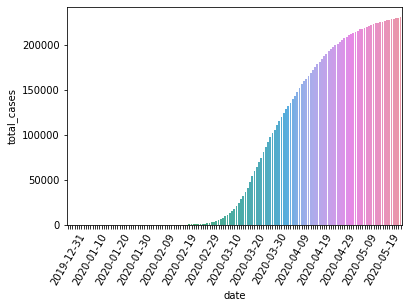

In [118]:
bx = sns.barplot(x = "date", y="total_cases", data=italy)
bx.set_xticklabels(italy.date,rotation=60)
for i, t in enumerate(bx.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)

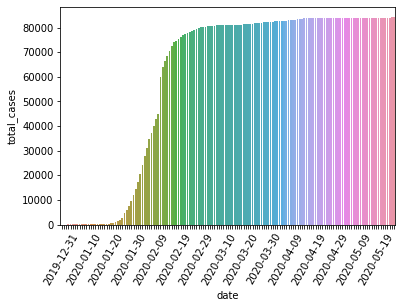

In [119]:
cx = sns.barplot(x = "date", y="total_cases", data=china)
cx.set_xticklabels(china.date,rotation=60)
for i, t in enumerate(cx.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)

In [117]:
# refreshing myself on what data I have access to: is there a variable for recovered people??
covid.columns
# answer is no. so that's a bit of an issue..

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')